### Machine Learning Foundation Specialization

#### University of Washington - Seattle

<br>

#### Week 6 Quiz#2 Deep Learning Features for Image Retrieval

<br>

In [1]:
## Created by Quincy Gu
## Created on 05/07/2020 19:23
## Gu.Qiangqiang@mayo.edu
## Mayo Clinic College of Medicine and Sciences

<br>

##### **Instructions:**

##### **Task 1: Compute summary statistics of the data**

##### Sketch summaries are techniques for computing summary statistics of data very quickly. In Turi Create has a method sketch which computes summary statistics. Using the training data, compute the sketch summary of the label olumn and interpret the results by running this command.

##### sketch = turicreate.Sketch(image_data['label'])

##### Then look at the sketch object to see the summary statistics.

##### For more information on Sketch, see this [link](https://apple.github.io/turicreate/docs/api/generated/turicreate.Sketch.html?highlight=sketch)

##### What is the least common category in the training data?

##### **Save this result to answer the quiz for this module.**

##### **Task 2: Create category-specific image retrieval models**

##### In most retrieval tasks, the data are unlabeled, thus you call these unsupervised learning problems. This image dataset has labels, so you will use them to create one model for each of the four image categories, dog, cat, automobile, and bird.

##### Follow these steps:

##### 1. Split the training data into 4 different SFrame data structures. Each will contain data for one of the four categories image categories. (Hint: If you use a logical filter to select the rows where the label column equals ‘dog’, you can create an SFrame that contains only the data for images labeled ‘dog’.)

##### 2. Similarly to the image retrieval notebook you downloaded, you will create a nearest neighbor model using deep features. You will create one such model for each category, using the corresponding subset of the training data. Call the model with the dog images dog_model, the one with the cat images cat_model, as so on.

##### You now have a nearest neighbors model, dog_model, that can find the nearest dog to any image you give the model. Another model, cat_model, that can find the nearest cat to any image you give it, and so on.

##### The following cat image is the first in the test data (image_test[0:1]):
![](Images/A1.png)

##### Using these models, answer the following questions.

##### * What is the nearest cat-labeled image in the training data to the cat image that is the first image in the test data ?
##### * What is the nearest dog-labeled image in the training data to the cat image that is the first image in the test data?

##### Hint: When you query your nearest neighbors model, it will return a result that looks something like this:
![](Images/A2.png)

##### To understand each column in this table, see this [documentation](https://turi.com/learn/userguide/nearest_neighbors/nearest_neighbors.html). The reference_label column is important, since it provides the index of the nearest neighbors in the dataset used to train it. (In this case, the subset of the training data labeled ‘cat’.)

##### **Save these results to answer the quiz for this module.**

##### **Task 3: Try a simple example of nearest-neighbors classification**

##### When you queried the nearest neighbors model, the distance column in the Task 2 showed the computed distance between the input and each of the retrieved neighbors. In this task, you will use these distances for classification, using a nearest-neighbors classifier.

##### * For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘cat’ in the training data (similar to what you did in the previous question).

##### * For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘dog’ in the training data (similar to what you did in the previous question).

##### On average, is the first image in the test data closer to its five nearest neighbors in the ‘cat’ data or in the ‘dog’ data?

##### **Save these results to answer the quiz for this module.**

##### **Task 4: Compute nearest neighbors accuracy**

##### A nearest neighbor classifier predicts the label of a point as the most common label of its nearest neighbors. In this task, you will measure the accuracy of a 1-nearest-neighbor classifier, i.e., predict the output as the label of the nearest neighbor in the training data. Although there are simpler ways of computing this result, this way introduces you to additional concepts in nearest neighbors and SFrames, which will be useful in your future machine learning education.

##### Use the four nearest neighbors models you trained previously on the training data, the dog, cat, automobile, and bird models.

##### Just as you split the training data on label, you will now use the same procedure to split the test data on the cat, dog, automobile, and bird labels. Name the resulting SFrame data structures:

##### image_test_cat, image_test_dog, image_test_bird, image_test_automobile

##### Next you'll find nearest neighbors in the training set for each part of the test set

##### Thus far you queried the nearest neighbors models with a single image as the input, but you can actually query with a whole set of data. The query will find the nearest neighbors for each data point. Note that the input index is stored in the query_labelcolumn of the resulting SFrame.

##### Using this knowledge find the closest neighbor to the dog test data using each of the trained models. For example, this code:

##### dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

##### finds one neighbor (i.e., k=1) to the dog test images (image_test_dog) in the cat portion of the training data.

##### Next, follow the same procedure for the other dog combinations: dog-automobile, dog-bird, and dog-dog.

##### Create an SFrame with the distances from the dog test examples to the respective nearest neighbors in each class in the training data.

##### The distance column in dog_cat_neighbors contains the distance between each dog-labeled image in the test set and its nearest cat-labeled image in the training set. The question to answer is: How many of the test set dog images are closer to a dog in the training set than to a cat, automobile, or bird?

##### Next you will create an SFrame containing just these distances per data point. The goal is to create an SFrame called dog_distances with 4 columns:

##### dog_distances[‘dog-dog’] ---- storing dog_dog_neighbors[‘distance’]
##### dog_distances[‘dog-cat’] ---- storing dog_cat_neighbors[‘distance’]
##### dog_distances[‘dog-automobile’] ---- storing dog_automobile_neighbors[‘distance’]
##### dog_distances[‘dog-bird’] ---- storing dog_bird_neighbors[‘distance’]
##### Hint: You can create a new SFrame from the columns of other SFrame structures by creating a dictionary with the new columns, as shown in this example:

##### news_frame = turicreate.SFrame({'foo': others_frame['foo'],'bar': some_others_frame['bar']})

##### The resulting SFrame will look similar to this:
![](Images/A3.png)

##### Compute the number of correct predictions using 1-nearest neighbors for the dog class.

##### Now that you have created dog_distances, you will use the apply method on this SFrame to iterate through each row and compute the number of dog test examples where the distance to the nearest dog image was lower than that to the other image classes.

##### You will perform three steps:

##### 1. Consider one row of dog_distances and call this variable row. You can access each distance by calling, for example, row['dog-cat'] which, in the previous table, will have value equal to 36.4196077068 for the first row. Create a function, def is_dog_correct(row):, that returns 1 if the value for row[‘dog-dog’] is lower than that of the other columns, and 0 otherwise. That is, returns 1 if this row is correctly classified by 1-nearest neighbors, and 0 if it is not.

##### 2. Using the function is_dog_correct(row), you can check if one row is correctly classified. Next, you need to count how many rows are correctly classified. You could use a for loop to iterate through each row and apply the function is_dog_correct(row), but this method is extremely slow. An SFrame is not optimized for this type of operation. Instead, use the apply method to iterate the function is_dog_correct for each row.

##### 3. Compute the number of correct predictions for dog. You can now call the function dog_distances.apply(is_dog_correct)which returns an SArray structure (a column of data) with a value 1 for every correct row and a value 0 for every incorrect one. You can call the sum method on the result to get the total number of correctly classified dog images in the test set.

##### Using the work you did in this task, what is the accuracy of the 1-nearest neighbor classifier at classifying dog images from the test set?

##### **NOTE:** If you are uncertain that your code is working correctly, you can perform steps 1 and 2 to count the number of correctly classified cat images in the test data. Your result should be 548. This verification will take you some time, so you might do it only if you get the wrong answer on the quiz and can't figure out why. 

##### **Save these results to answer the quiz for this module.**

<br>

##### **What you will do:**

In [15]:
import turicreate

In [18]:
image_train = turicreate.SFrame('image_train_data')
image_test = turicreate.SFrame('image_test_data')

In [21]:
turicreate.visualization.set_target('auto')

In [27]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

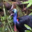
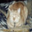
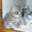
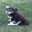
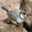
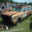
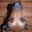
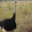
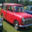
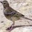

In [52]:
image_train['image'].head().explore()

,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

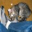
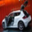
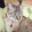
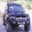
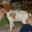
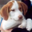
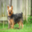
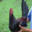
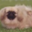
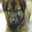

In [53]:
image_test['image'].head().explore()

##### 1. **Computing summary statistics of the data:** Sketch summaries are techniques for computing summary statistics of data very quickly. In Turi Create, SArrays include a method:

In [34]:
## .summary()

##### which computes such summary statistics. Using the training data, compute the summary of the ‘label’ column and interpret the results. What’s the least common category in the training data? **Save this result to answer the quiz at the end.**

In [35]:
image_train['label'].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


##### 2. **Creating category-specific image retrieval models:** In most retrieval tasks, the data we have is unlabeled, thus we call these unsupervised learning problems. However, we have labels in this image dataset, and will use these to create one model for each of the 4 image categories, {‘dog’,’cat’,’automobile’,bird’}. To start, follow these steps:

##### * Split the SFrame with the training data into 4 different SFrames. Each of these will contain data for 1 of the 4 categories above. Hint: if you use a logical filter to select the rows where the ‘label’ column equals ‘dog’, you can create an SFrame with only the data for images labeled ‘dog’.

In [36]:
automobile = image_train.filter_by(['automobile'],'label')
cat = image_train.filter_by(['cat'],'label')
dog = image_train.filter_by(['dog'],'label')
bird = image_train.filter_by(['bird'],'label')

##### * Similarly to the image retrieval notebook you downloaded, you are going to create a nearest neighbor model using the 'deep_features' as the features, but this time create one such model for each category, using the corresponding subset of the training_data. You can call the model with the ‘dog’ data the dog_model, the one with the ‘cat’ data the cat_model, as so on.

In [38]:
automobile.head()
cat.head()
dog.head()
bird.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."
335,Height: 32 Width: 32,bird,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 8.50706672668457, ...","[160.0, 159.0, 154.0,162.0, 161.0, 156.0, ..."
560,Height: 32 Width: 32,bird,"[1.6915949583053589, 0.0,0.0, 0.0, 0.0, 0.0, ...","[147.0, 138.0, 88.0,151.0, 142.0, 92.0, ..."
649,Height: 32 Width: 32,bird,"[0.5111562013626099,0.3241650462150574, 0.0, ...","[65.0, 127.0, 9.0, 127.0,160.0, 15.0, 159.0, ..."
775,Height: 32 Width: 32,bird,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 10.012731552124023, ...","[29.0, 41.0, 25.0, 29.0,42.0, 25.0, 28.0, 41.0, ..."
802,Height: 32 Width: 32,bird,"[0.2771667242050171, 0.0,0.0, 0.0, 0.0, 0.0, ...","[233.0, 230.0, 173.0,222.0, 218.0, 168.0, ..."
975,Height: 32 Width: 32,bird,"[0.0,0.03367185592651367, ...","[59.0, 180.0, 110.0,88.0, 186.0, 117.0, ..."


In [42]:
automobile_model  = turicreate.nearest_neighbors.create(automobile, features=['deep_features'],
                                                     label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [43]:
cat_model  = turicreate.nearest_neighbors.create(cat, features=['deep_features'],
                                                     label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [44]:
dog_model  = turicreate.nearest_neighbors.create(dog, features=['deep_features'],
                                                     label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [45]:
bird_model  = turicreate.nearest_neighbors.create(bird, features=['deep_features'],
                                                     label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

##### You now have a nearest neighbors model that can find the nearest ‘dog’ to any image you give it, the dog_model; one that can find the nearest ‘cat’, the cat_model; and so on.

##### Using these models, answer the following questions. The cat image below is the first in the test data:
![](Images/A4.png)

##### You can access this image, similarly to what we did in the Jupyter notebooks above, with this command:

In [46]:
image_test[0:1]

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."


,SArray
0,

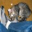

In [49]:
image_test[0:1]['image'].explore()

##### What is the nearest ‘cat’ labeled image in the training data to the cat image above (the first image in the test data)? **Save this result.**

In [54]:
cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 10.021ms     |

| Done         |         | 100         | 36.18ms      |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


##### Hint: When you query your nearest neighbors model, it will return a SFrame that looks something like this:
![](Images/A5.png)

##### [To understand each column in this table, see this documentation](https://github.com/apple/turicreate/blob/master/userguide/nearest_neighbors/nearest_neighbors.md). For this question, the ‘reference_label’ column will be important, since it provides the index of the nearest neighbors in the dataset used to train it. (In this case, the subset of the training data labeled ‘cat’.)

In [58]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

,SArray
0,

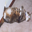

In [57]:
cat_image = image_train[image_train['id']==16289]
cat_image['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.378ms      |

| Done         |         | 100         | 32.883ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

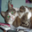
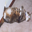
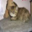
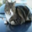
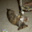

In [59]:
get_images_from_ids(cat_model.query(image_test[0:1]))['image'].explore()

##### What is the nearest ‘dog’ labeled image in the training data to the cat image above (the first image in the test data)? **Save this result.**

In [60]:
dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.187ms      |

| Done         |         | 100         | 39.644ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

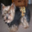

In [61]:
dog_image = image_train[image_train['id']==16976]
dog_image['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 8.244ms      |

| Done         |         | 100         | 41.575ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

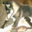
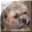
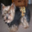
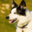
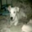

In [63]:
get_images_from_ids(dog_model.query(image_test[0:1]))['image'].explore()

##### 3. **A simple example of nearest-neighbors classification:** When we queried a nearest neighbors model, the ‘distance’ column in the table above shows the computed distance between the input and each of the retrieved neighbors. In this question, you will use these distances to perform a classification task, using the idea of a nearest-neighbors classifier.

##### * For the first image in the test data (image_test[0:1]), which we used above, compute the mean distance between this image at its 5 nearest neighbors that were labeled **‘cat’** in the training data (similarly to what you did in the previous question). **Save this result.**

In [64]:
cat_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 4.466ms      |

| Done         |         | 100         | 34.864ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

##### * Similarly, for the first image in the test data (image_test[0:1]), which we used above, compute the mean distance between this image at its 5 nearest neighbors that were labeled **‘dog’** in the training data (similarly to what you did in the previous question). **Save this result.**

In [65]:
dog_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.962ms      |

| Done         |         | 100         | 34.365ms     |

+--------------+---------+-------------+--------------+

37.77071136184157

##### * On average, is the first image in the test data closer to its 5 nearest neighbors in the ‘cat’ data or in the ‘dog’ data? (In a later course, we will see that this is an example of what is called a k-nearest neighbors classifier, where we use the label of neighboring points to predict the label of a test point.)

##### 4. **[Challenging Question] Computing nearest neighbors accuracy using SFrame operations:** A nearest neighbor classifier predicts the label of a point as the most common label of its nearest neighbors. In this question, we will measure the accuracy of a 1-nearest-neighbor classifier, i.e., predict the output as the label of the nearest neighbor in the training data. Although there are simpler ways of computing this result, we will go step-by-step here to introduce you to more concepts in nearest neighbors and SFrames, which will be useful later in this Specialization.

##### * **Training models:** For this question, you will need the nearest neighbors models you learned above on the training data, i.e., the dog_model, cat_model, automobile_model and bird_model.

##### * **Spliting test data by label:** Above, you split the train data SFrame into one SFrame for images labeled ‘dog’, another for those labeled ‘cat’, etc. Now, do the same for the test data. You can call the resulting SFrames

In [66]:
## image_test_cat, image_test_dog, image_test_bird, image_test_automobile
image_test_automobile = image_test.filter_by(['automobile'],'label')
image_test_cat = image_test.filter_by(['cat'],'label')
image_test_dog = image_test.filter_by(['dog'],'label')
image_test_bird = image_test.filter_by(['bird'],'label')

##### * **Finding nearest neighbors in the training set for each part of the test set:** Thus far, we have queried, e.g.,

In [5]:
## dog_model.query()

##### our nearest neighbors models with a single image as the input, but you can actually query with a whole set of data, and it will find the nearest neighbors for each data point. Note that the input index will be stored in the ‘query_label’ column of the output SFrame.

##### Using this knowledge find the closest neighbor to each example the dog test data using each of the trained models, e.g.,

In [7]:
## dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

##### finds 1 neighbor (that’s what k=1 does) to each of the dog test images (image_test_dog) in the cat portion of the training data (used to train the cat_model).

##### Now, do this for every combination of the labels in the training and test data.

##### Create an SFrame with the distances from ‘dog’ test examples to the respective nearest neighbors in each class in the training data: The ‘distance’ column in dog_cat_neighbors above contains the distance between each ‘dog’ image in the test set and its nearest ‘cat’ image in the training set. The question we want to answer is how many of the test set ‘dog’ images are closer to a ‘dog’ in the training set than to a ‘cat’, ‘automobile’ or ‘bird’. So, next we will create an SFrame containing just these distances per data point. The goal is to create an SFrame called dog_distances with 4 columns:
##### i. dog_distances[‘dog-dog’] ---- storing dog_dog_neighbors[‘distance’]

##### ii. dog_distances[‘dog-cat’] ---- storing dog_cat_neighbors[‘distance’]

##### iii. dog_distances[‘dog-automobile’] ---- storing dog_automobile_neighbors[‘distance’]

##### iv. dog_distances[‘dog-bird’] ---- storing dog_bird_neighbors[‘distance’]

##### Hint: You can create a new SFrame from the columns of other SFrames by creating a dictionary with the new columns, as shown in this example:

In [67]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 194ms        |

| Done         | 509000  | 100         | 212.175ms    |

+--------------+---------+-------------+--------------+

In [68]:
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 189.816ms    |

| Done         | 509000  | 100         | 211.497ms    |

+--------------+---------+-------------+--------------+

In [69]:
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 187.355ms    |

| Done         | 509000  | 100         | 220.985ms    |

+--------------+---------+-------------+--------------+

In [70]:
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 59000   | 12.3431     | 191.187ms    |

| Done         | 478000  | 100         | 209.952ms    |

+--------------+---------+-------------+--------------+

In [8]:
## new_sframe = turicreate.SFrame({'foo': other_sframe['foo'],'bar': some_other_sframe['bar']})

In [72]:
dog_distances = turicreate.SFrame({'dog_automobile': dog_automobile_neighbors['distance'],
                              'dog_bird': dog_bird_neighbors['distance'],
                              'dog_cat': dog_cat_neighbors['distance'],
                              'dog_dog': dog_dog_neighbors['distance']
                             })

In [73]:
dog_distances.head()

dog_automobile,dog_bird,dog_cat,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


##### The resulting SFrame will look something like this:
![](Images/A6.png)

##### * **Computing the number of correct predictions using 1-nearest neighbors for the dog class:** Now that you have created the SFrame dog_distances, you will learn to use the method

In [9]:
## .apply()

##### on this SFrame to iterate line by line and compute the number of ‘dog’ test examples where the distance to the nearest ‘dog’ was lower than that to the other classes. You will do this in three steps:

##### i. Consider one row of the SFrame dog_distances. Let’s call this variable row. You can access each distance by calling, for example,

In [10]:
## row['dog-cat']

##### which, in example table above, will have value equal to 36.4196077068 for the first row.

##### Create a function starting with

In [11]:
## def is_dog_correct(row):

##### which returns 1 if the value for row[‘dog-dog’] is lower than that of the other columns, and 0 otherwise. That is, returns 1 if this row is correctly classified by 1-nearest neighbors, and 0 otherwise.

In [74]:
def is_dog_correct(row):  
    if row['dog_dog'] <= min(row.values()):     
        return 1    
    else:        
        return 0

##### ii. Using the function is_dog_correct(row), you can check if 1 row is correctly classified. Now, you want to count how many rows are correctly classified. You could do a for loop iterating through each row and applying the function is_dog_correct(row). This method will be really slow, because the SFrame is not optimized for this type of operation.

##### Instead, we will use the .apply() method to iterate the function is_dog_correct for each row of the SFrame. [Read about using the .apply() method here](https://turi.com/learn/userguide/sframe/tabular-data.html).

##### iii. **Computing the number of correct predictions for ‘dog’:** You can now call:

In [75]:
dog_distances.apply(is_dog_correct)

dtype: int
Rows: 1000
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ... ]

##### which will return an SArray (a column of data) with a 1 for every correct row and a 0 for every incorrect one. You can call:

In [14]:
## .sum()

In [76]:
dog_distances.apply(is_dog_correct).sum()

678

##### on the result to get the total number of correctly classified ‘dog’ images in the test set!

##### Hint: To make sure your code is working correctly, if you were to do the steps above in this question to computer 'cat distances' and count the number of correctly classified ‘cat’ images in the test data, instead of ‘dog’, the result would be 548.

##### * **Accuracy of predicting dog in the test data:** Using the work you did in this question, what is the accuracy of the 1-nearest neighbor classifier at classifying ‘dog’ images from the test set? **Save this result to answer the quiz at the end.**

In [77]:
cat_distances = turicreate.SFrame({'cat_automobile': automobile_model.query(image_test_cat, k=1)['distance'],
                                 'cat_bird': bird_model.query(image_test_cat, k=1)['distance'],
                                 'cat_cat': cat_model.query(image_test_cat, k=1)['distance'],
                                 'cat_dog': dog_model.query(image_test_cat, k=1)['distance'],
                                })

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 199.641ms    |

| Done         | 509000  | 100         | 217.989ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 187.576ms    |

| Done         | 478000  | 100         | 205.146ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 183.539ms    |

| Done         | 509000  | 100         | 203.933ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 192.093ms    |

| Done         | 509000  | 100         | 221.949ms    |

+--------------+---------+-------------+--------------+

In [78]:
cat_distances.head()

cat_automobile,cat_bird,cat_cat,cat_dog
39.67105827921273,38.07426586900459,34.62371920804243,37.464262878423845
43.00890566881215,36.36740241377261,33.868057930239424,29.347231958505894
38.60100066036172,35.303939494706285,32.46151689024062,32.259964047497306
39.35663070911102,38.89440296011285,35.77082102542339,35.385208518819475
38.3572372618227,34.28204098747585,31.157768641742653,30.04429850876174
42.09047931808273,44.53521701779428,41.398603584704766,35.4741000423819
39.05202512531326,34.0290595084087,30.989459495892984,32.58452752259978
39.30586450690295,39.02369249827745,37.08146073866276,37.650285261439834
43.02481297990393,40.83340542972473,39.988386368829005,36.98013535120841
45.67491764256238,40.12588356010239,39.70766330973091,41.12594107067673


In [79]:
def is_cat_correct(row):  
    if row['cat_cat'] <= min(row.values()):     
        return 1    
    else:        
        return 0

In [80]:
cat_distances.apply(is_cat_correct).sum()

548

In [81]:
dog_distances.apply(is_dog_correct).sum()/float(len(dog_distances))

0.678

<br>

##### **Quiz Problems and Answers:**

##### **Problem 1.** What’s the least common category in the training data?

##### A. bird
##### B. dog
##### C. cat
##### D. automobile

##### **Answer:** A

<br>

##### **Problem 2.** Of the images below, which is the nearest ‘cat’ labeled image in the training data to the the first image in the test data (image_test[0:1])?

[A](Images/2-1.png)
[B](Images/2-2.png)
[C](Images/2-3.png)
[D](Images/2-4.png)
[E](Images/2-5.png)
[F](Images/2-6.png)

##### **Answer:** F

<br>

##### **Problem 3.** Of the images below, which is the nearest ‘dog’ labeled image in the training data to the the first image in the test data (image_test[0:1])?

[A](Images/3-1.png)
[B](Images/3-2.png)
[C](Images/3-3.png)
[D](Images/3-4.png)
[E](Images/3-5.png)
[F](Images/3-6.png)

##### **Answer:** D

<br>

##### **Problem 4.** For the first image in the test data, in what range is the mean distance between this image and its 5 nearest neighbors that were labeled **‘cat’** in the training data?

##### A. 33 to 35
##### B. 35 to 37
##### C. 37 to 39
##### D. 39 to 41
##### E. Above 41

##### **Answer:** B

<br>

##### **Problem 5.** For the first image in the test data, in what range is the mean distance between this image and its 5 nearest neighbors that were labeled **‘dog’** in the training data?

##### A. 33 to 35
##### B. 35 to 37
##### C. 37 to 39
##### D. 39 to 41
##### E. Above 41

##### **Answer:** C

<br>

##### **Problem 6.** On average, is the first image in the test data closer to its 5 nearest neighbors in the **‘cat’** data or in the **‘dog’** data?

##### A. cat
##### B. dog

##### **Answer:** A

<br>

##### **Problem 7.** In what range is the accuracy of the 1-nearest neighbor classifier at classifying ‘dog’ images from the test set?

##### A. 50 to 60
##### B. 60 to 70
##### C. 70 to 80
##### D. 80 to 90
##### E. 90 to 100

##### **Answer:** B

<br>

##### I, **QUINCY GU**, understand that submitting work that isn’t my own may result in permanent failure of this course or deactivation of my Coursera account. 
##### [Learn more about Coursera’s Honor Code](https://learner.coursera.help/hc/en-us/articles/209818863)